<a href="https://colab.research.google.com/github/Keita062/soccer/blob/main/10_28(second).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 読み込むCSVファイルのパスをリスト化
file_paths = [
    "/content/1992.csv", "/content/1993.csv", "/content/1994.csv", "/content/1995.csv",
    "/content/1996.csv", "/content/1997.csv", "/content/1998.csv", "/content/1999.csv",
    "/content/2000.csv", "/content/2001.csv", "/content/2002.csv", "/content/2003.csv",
    "/content/2004.csv", "/content/2005.csv", "/content/2006.csv", "/content/2007.csv",
    "/content/2008.csv", "/content/2009.csv", "/content/2010.csv", "/content/2011.csv",
    "/content/2012.csv", "/content/2013.csv", "/content/2014.csv", "/content/2015.csv",
    "/content/2017.csv", "/content/2018.csv", "/content/2019.csv", "/content/2020.csv"
]

# 各CSVファイルをDataFrameとして読み込み、リストに格納
data_frames = [pd.read_csv(file) for file in file_paths]

# すべてのDataFrameを縦方向に結合
total_premia_data  = pd.concat(data_frames, ignore_index=True)

# データ確認
total_premia_data


,Round,Date,Team 1,FT,Team 2
0,1,Sat Aug 15 1992,Arsenal FC,2-4,Norwich City FC
1,1,Sat Aug 15 1992,Leeds United FC,2-1,Wimbledon FC
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa FC
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC
...,...,...,...,...,...
10881,38,Sun May 23 2021,West Ham,3–0,Southampton
10882,38,Sun May 23 2021,Leeds United,3–1,West Brom
10883,38,Sun May 23 2021,Arsenal,2–0,Brighton
10884,38,Sun May 23 2021,Liverpool,2–0,Crystal Palace


In [4]:
# 元のチーム名の配列
teams = np.array([
    'Manchester United FC', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC',
    'Tottenham Hotspur FC', 'Everton FC', 'Manchester City FC',
    'Newcastle United FC', 'Aston Villa FC', 'West Ham United FC',
    'Blackburn Rovers FC', 'Southampton FC', 'Leeds United FC',
    'Middlesbrough FC', 'Leicester City FC', 'Fulham FC',
    'Sunderland AFC', 'Bolton Wanderers FC', 'Crystal Palace FC',
    'West Bromwich Albion FC', 'Stoke City FC', 'Coventry City FC',
    'Sheffield Wednesday FC', 'Wimbledon FC', 'Norwich City FC',
    'Charlton Athletic FC', 'Wigan Athletic FC',
    'Queens Park Rangers FC', 'Portsmouth FC', 'Birmingham City FC',
    'Derby County FC', 'Swansea City FC', 'Wolverhampton Wanderers FC',
    'Nottingham Forest FC', 'Ipswich Town FC', 'Watford FC',
    'Burnley FC', 'Sheffield United FC', 'AFC Bournemouth',
    'Hull City AFC', 'Reading FC', 'Brighton & Hove Albion FC',
    'Oldham Athletic AFC', 'Cardiff City FC', 'Bradford City AFC',
    'Huddersfield Town AFC', 'Blackpool FC', 'Tottenham', 'West Brom',
    'West Ham', 'Southampton', 'Liverpool', 'Sheffield Utd',
    'Newcastle Utd', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
    'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
    'Leicester City', 'Arsenal', 'Manchester City', 'Manchester Utd',
    'Wolves', 'Barnsley FC', 'Swindon Town FC'
])

# チーム名の標準化を行う辞書
team_name_mapping = {
    'Manchester United FC': 'Manchester United',
    'Manchester Utd': 'Manchester United',
    'Arsenal FC': 'Arsenal',
    'Arsenal': 'Arsenal',
    'Chelsea FC': 'Chelsea',
    'Chelsea': 'Chelsea',
    'Liverpool FC': 'Liverpool',
    'Liverpool': 'Liverpool',
    'Tottenham Hotspur FC': 'Tottenham Hotspur',
    'Tottenham': 'Tottenham Hotspur',
    'Everton FC': 'Everton',
    'Everton': 'Everton',
    'Manchester City FC': 'Manchester City',
    'Manchester City': 'Manchester City',
    'Newcastle United FC': 'Newcastle United',
    'Newcastle Utd': 'Newcastle United',
    'Aston Villa FC': 'Aston Villa',
    'Aston Villa': 'Aston Villa',
    'West Ham United FC': 'West Ham United',
    'West Ham': 'West Ham United',
    'Southampton FC': 'Southampton',
    'Southampton': 'Southampton',
    'Fulham FC': 'Fulham',
    'Fulham': 'Fulham',
    'Leeds United FC': 'Leeds United',
    'Leeds United': 'Leeds United',
    'Leicester City FC': 'Leicester City',
    'Leicester City': 'Leicester City',
    'Brighton & Hove Albion FC': 'Brighton',
    'Brighton': 'Brighton',
    'Burnley FC': 'Burnley',
    'Burnley': 'Burnley',
    'Wolverhampton Wanderers FC': 'Wolves',
    'Wolves': 'Wolves',
    # 追加のチーム名のマッピングをここに追加できます
}

# チーム名を標準化する
standardized_teams = np.array([team_name_mapping.get(team, team) for team in teams])

# 結果を表示
unique_teams = np.unique(standardized_teams)

In [5]:
total_premia_data['Team 1'] = total_premia_data['Team 1'].map(team_name_mapping).fillna(total_premia_data['Team 1'])
total_premia_data['Team 2'] = total_premia_data['Team 2'].map(team_name_mapping).fillna(total_premia_data['Team 2'])

# Date列を曜日, 月, 日, 年に分割 (例: 'Sat Oct 14 2020')
total_premia_data[['Weekday', 'Month', 'Day', 'Year']] = total_premia_data['Date'].str.split(' ', expand=True)

# Day列を整数型に変換
total_premia_data['Day'] = pd.to_numeric(total_premia_data['Day'], errors='coerce')

# FT列(スコア)を分割 (例: '2-4' → 'Team1_Score' と 'Team2_Score')
total_premia_data[['Team1_Score', 'Team2_Score']] = total_premia_data['FT'].str.split('-', expand=True)

# スコア列を整数型に変換
total_premia_data['Team1_Score'] = pd.to_numeric(total_premia_data['Team1_Score'], errors='coerce')
total_premia_data['Team2_Score'] = pd.to_numeric(total_premia_data['Team2_Score'], errors='coerce')

total_premia_data.head()

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score
0,1,Sat Aug 15 1992,Arsenal,2-4,Norwich City FC,Sat,Aug,15,1992,2.0,4.0
1,1,Sat Aug 15 1992,Leeds United,2-1,Wimbledon FC,Sat,Aug,15,1992,2.0,1.0
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC,Sat,Aug,15,1992,2.0,1.0
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa,Sat,Aug,15,1992,1.0,1.0
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC,Sat,Aug,15,1992,3.0,3.0


In [7]:
# 1. チームごとの勝敗・得失点などのデータを初期化する
teams_stats = []

# 2. 各試合の結果をもとに、勝敗や得点を集計
for _, row in total_premia_data.iterrows():
    team1, team2 = row['Team 1'], row['Team 2']
    score1, score2 = row['Team1_Score'], row['Team2_Score']

    # 勝敗の判定
    if score1 > score2:
        result1, result2 = 'win', 'loss'
    elif score1 < score2:
        result1, result2 = 'loss', 'win'
    else:
        result1, result2 = 'draw', 'draw'

    # 各チームの試合結果をリストに格納
    teams_stats.extend([
        {'Team': team1, 'Result': result1, 'GoalsScored': score1, 'GoalsConceded': score2},
        {'Team': team2, 'Result': result2, 'GoalsScored': score2, 'GoalsConceded': score1}
    ])

# 3. DataFrameに変換
df_stats = pd.DataFrame(teams_stats)

# 4. 集計処理
summary = df_stats.groupby(['Team']).agg(
    Matches=('Result', 'count'),
    Wins=('Result', lambda x: (x == 'win').sum()),
    Draws=('Result', lambda x: (x == 'draw').sum()),
    Losses=('Result', lambda x: (x == 'loss').sum()),
    GoalsScored=('GoalsScored', 'sum'),
    GoalsConceded=('GoalsConceded', 'sum')
).reset_index()

# 5. 得失点差と勝点を計算
summary['GoalDifference'] = summary['GoalsScored'] - summary['GoalsConceded']
summary['Points'] = summary['Wins'] * 3 + summary['Draws']

# 6. データフレームを表示
summary

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
0,AFC Bournemouth,152,44,33,75,186.0,263.0,-77.0,165
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974
2,Aston Villa,1000,325,321,354,1158.0,1253.0,-95.0,1296
3,Barnsley FC,38,10,5,23,37.0,82.0,-45.0,35
4,Birmingham City FC,266,73,82,111,273.0,360.0,-87.0,301
5,Blackburn Rovers FC,696,262,184,250,927.0,907.0,20.0,970
6,Blackpool FC,38,10,9,19,55.0,78.0,-23.0,39
7,Bolton Wanderers FC,494,149,128,217,575.0,745.0,-170.0,575
8,Bradford City AFC,76,14,20,42,68.0,138.0,-70.0,62
9,Brighton,152,27,74,51,108.0,168.0,-60.0,155


In [8]:
# ビッグ6クラブのリスト
big6_teams  = ["Manchester United", "Liverpool", "Chelsea", "Arsenal", "Manchester City", "Tottenham Hotspur"]
big6_data = summary[summary['Team'].isin(big6_teams)]

big6_matches = total_premia_data[
    (total_premia_data['Team 1'].isin(big6_teams)) &
    (total_premia_data['Team 2'].isin(big6_teams))
]

In [9]:
# リバプールが関与する試合の抽出
liverpool_matches = big6_matches[
    (big6_matches['Team 1'] == 'Liverpool') | (big6_matches['Team 2'] == 'Liverpool')
]
liverpool_matches

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score
32,3,Sun Aug 23 1992,Liverpool,0-2,Arsenal,Sun,Aug,23,1992,0.0,2.0
68,7,Sat Sep 5 1992,Liverpool,2-1,Chelsea,Sat,Sep,5,1992,2.0,1.0
129,12,Sun Oct 18 1992,Manchester United,2-2,Liverpool,Sun,Oct,18,1992,2.0,2.0
150,14,Sat Oct 31 1992,Tottenham Hotspur,2-0,Liverpool,Sat,Oct,31,1992,2.0,0.0
237,22,Mon Dec 28 1992,Liverpool,1-1,Manchester City,Mon,Dec,28,1992,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10705,20,Thu Jan 28 2021,Tottenham Hotspur,1–3,Liverpool,Thu,Jan,28,2021,NaN,NaN
10733,23,Sun Feb 07 2021,Liverpool,1–4,Manchester City,Sun,Feb,7,2021,NaN,NaN
10791,29,Thu Mar 04 2021,Liverpool,0–1,Chelsea,Thu,Mar,4,2021,NaN,NaN
10799,30,Sat Apr 03 2021,Arsenal,0–3,Liverpool,Sat,Apr,3,2021,NaN,NaN


In [11]:
# 1. チームごとの勝敗・得失点などのデータを初期化する
teams_stats = []

# 2. 各試合の結果をもとに、勝敗や得点を集計
for _, row in liverpool_matches.iterrows():
    team1, team2 = row['Team 1'], row['Team 2']
    score1, score2 = row['Team1_Score'], row['Team2_Score']

    # 勝敗の判定
    if score1 > score2:
        result1, result2 = 'win', 'loss'
    elif score1 < score2:
        result1, result2 = 'loss', 'win'
    else:
        result1, result2 = 'draw', 'draw'

    # 各チームの試合結果をリストに格納
    teams_stats.extend([
        {'Team': team1, 'Result': result1, 'GoalsScored': score1, 'GoalsConceded': score2},
        {'Team': team2, 'Result': result2, 'GoalsScored': score2, 'GoalsConceded': score1}
    ])

# 3. DataFrameに変換
df_stats = pd.DataFrame(teams_stats)

# 4. 集計処理
summary_liva = df_stats.groupby(['Team']).agg(
    Matches=('Result', 'count'),
    Wins=('Result', lambda x: (x == 'win').sum()),
    Draws=('Result', lambda x: (x == 'draw').sum()),
    Losses=('Result', lambda x: (x == 'loss').sum()),
    GoalsScored=('GoalsScored', 'sum'),
    GoalsConceded=('GoalsConceded', 'sum')
).reset_index()

# 5. 得失点差と勝点を計算
summary_liva['GoalDifference'] = summary_liva['GoalsScored'] - summary_liva['GoalsConceded']
summary_liva['Points'] = summary_liva['Wins'] * 3 + summary_liva['Draws']

# 6. データフレームを表示
summary_liva

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
0,Arsenal,56,16,21,19,67.0,84.0,-17.0,69
1,Chelsea,56,20,15,21,67.0,68.0,-1.0,75
2,Liverpool,270,100,82,88,376.0,331.0,45.0,382
3,Manchester City,46,10,17,19,58.0,70.0,-12.0,47
4,Manchester United,56,28,13,15,76.0,62.0,14.0,97
5,Tottenham Hotspur,56,14,16,26,63.0,92.0,-29.0,58


In [20]:
# "Team"列が"Liverpool"である行を削除
liv_drop_summary = summary_liva[summary_liva["Team"] != "Liverpool"]
liv_drop_summary

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
0,Arsenal,56,16,21,19,67.0,84.0,-17.0,69
1,Chelsea,56,20,15,21,67.0,68.0,-1.0,75
3,Manchester City,46,10,17,19,58.0,70.0,-12.0,47
4,Manchester United,56,28,13,15,76.0,62.0,14.0,97
5,Tottenham Hotspur,56,14,16,26,63.0,92.0,-29.0,58


In [21]:
liverpool_matches.to_csv('liverpool_matches.csv', index=False)

In [22]:
liverpool_matches.describe()

,Round,Day,Team1_Score,Team2_Score
count,270.000000,270.000000,260.000000,260.000000
mean,19.451852,15.777778,1.673077,1.046154
std,11.282924,9.060857,1.293303,1.000861
min,1.000000,1.000000,0.000000,0.000000
25%,9.000000,8.000000,1.000000,0.000000
50%,20.000000,16.000000,2.000000,1.000000
75%,29.750000,23.000000,2.000000,2.000000
max,42.000000,31.000000,6.000000,5.000000


In [24]:
liverpool_matches

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score
32,3,Sun Aug 23 1992,Liverpool,0-2,Arsenal,Sun,Aug,23,1992,0.0,2.0
68,7,Sat Sep 5 1992,Liverpool,2-1,Chelsea,Sat,Sep,5,1992,2.0,1.0
129,12,Sun Oct 18 1992,Manchester United,2-2,Liverpool,Sun,Oct,18,1992,2.0,2.0
150,14,Sat Oct 31 1992,Tottenham Hotspur,2-0,Liverpool,Sat,Oct,31,1992,2.0,0.0
237,22,Mon Dec 28 1992,Liverpool,1-1,Manchester City,Mon,Dec,28,1992,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10705,20,Thu Jan 28 2021,Tottenham Hotspur,1–3,Liverpool,Thu,Jan,28,2021,NaN,NaN
10733,23,Sun Feb 07 2021,Liverpool,1–4,Manchester City,Sun,Feb,7,2021,NaN,NaN
10791,29,Thu Mar 04 2021,Liverpool,0–1,Chelsea,Thu,Mar,4,2021,NaN,NaN
10799,30,Sat Apr 03 2021,Arsenal,0–3,Liverpool,Sat,Apr,3,2021,NaN,NaN


In [31]:
liverpool_matches.dtypes

,0
Round,int64
Date,object
Team 1,object
FT,object
Team 2,object
Weekday,object
Month,object
Day,int64
Year,object
Team1_Score,float64


In [40]:
# リバプールがTeam 1の場合の得点
liverpool_home_scores = liverpool_matches['Team1_Score'].where(liverpool_matches['Team 1'] == 'Liverpool')

# リバプールがTeam 2の場合の得点（Team2_Scoreを逆に取得）
livapool_away_scores = liverpool_matches['Team2_Score'].where(liverpool_matches['Team 2'] == 'Liverpool')

# 得点を一つのシリーズにまとめる
scores = pd.concat([liverpool_home_scores, livapool_away_scores]).dropna()


In [41]:
# リバプールの得点データの最小値と最大値を取得
min_score = int(scores.min())
max_score = int(scores.max())

# データポイント数
n = len(scores)

# ビンの数を計算（スタージェスのルール）
k = int(1 + 3.322 * np.log10(n))

# ビン幅を計算
bin_width = (max_score - min_score) / k

print(f"ビンの数: {k}, ビン幅: {bin_width}")


ビンの数: 9, ビン幅: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

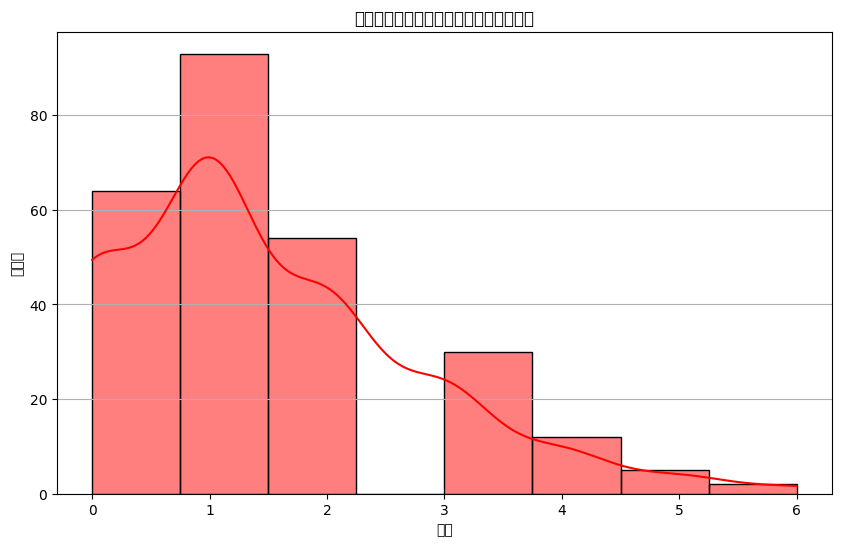

In [50]:
# 得点の分布をプロット
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=8, kde=True, color='red')
plt.title('リバプールが関与する試合の得点の分布')
plt.xlabel('得点')
plt.ylabel('試合数')
plt.xticks(range(int(scores.min()), int(scores.max()) + 1))
plt.grid(axis='y')

# プロットを表示
plt.show()

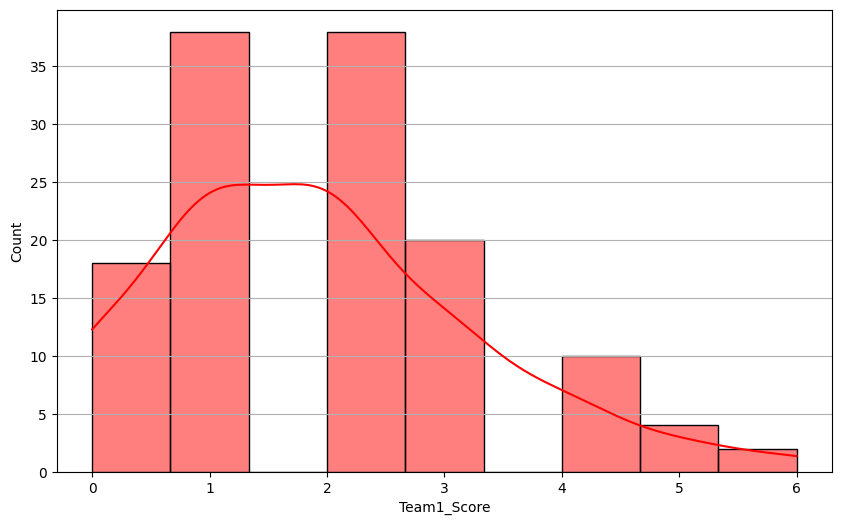

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(liverpool_home_scores, bins=9, kde=True, color='red')

plt.xticks(range(int(liverpool_home_scores.min()), int(liverpool_home_scores.max()) + 1))
plt.grid(axis='y')

# プロットを表示
plt.show()

In [52]:
liverpool_home_scores.describe()

,Team1_Score
count,130.000000
mean,1.892308
std,1.353984
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


In [53]:
livapool_away_scores.describe()

,Team2_Score
count,130.000000
mean,1.000000
std,1.026773
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,5.000000
